# Lesson 6. Pets Revisited

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

In [5]:
bs = 64

In [8]:
path = untar_data(URLs.PETS)/'images'; path

PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images')

### Data Augmentation

In [38]:
tfms = get_transforms(max_rotate=20, max_zoom=1.2, max_lighting=0.3, max_warp=0.3,
                     p_affine=1., p_lighting=1.)

In [39]:
src = ImageList.from_folder(path).split_by_rand_pct(0.2, seed = 42)

In [40]:
def get_data(size, bs, padding_mode='reflection'):
    return (src.label_from_re(r'([^/]+)_\d+.jpg$')
           .transform(tfms, size=size, padding_mode=padding_mode)
           .databunch(bs=bs).normalize(imagenet_stats))

In [41]:
data = get_data(255, bs, 'zeros')

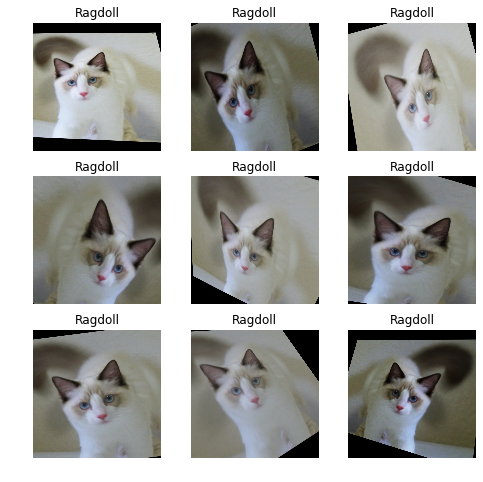

In [42]:
def _plot(i,j,ax):
    x,y = data.train_ds[3]
    x.show(ax, y=y)

plot_multi(_plot, 3, 3, figsize=(8,8))

In [43]:
data = get_data(365, bs)

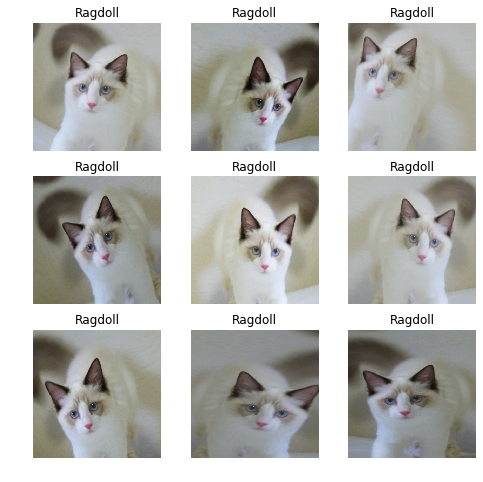

In [44]:
plot_multi(_plot, 3, 3, figsize=(8,8))

### Training

In [45]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, bn_final = True)

In [46]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


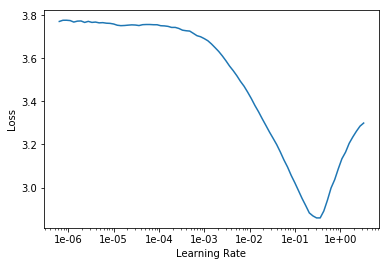

In [47]:
learn.recorder.plot()

In [48]:
learn.fit_one_cycle(3, slice(1e-02))

epoch,train_loss,valid_loss,error_rate,time
0,1.886953,0.348016,0.072395,02:02
1,0.924984,0.218242,0.052774,02:01
2,0.630151,0.235979,0.054804,02:02


In [49]:
learn.unfreeze()

In [50]:
learn.fit_one_cycle(2, max_lr = slice(1e-6, 1e-3), pct_start=0.8)

epoch,train_loss,valid_loss,error_rate,time
0,0.551320,0.239347,0.049391,02:43
1,0.527235,0.239739,0.054804,02:42


In [51]:
data = get_data(365, bs)

In [52]:
learn.fit

In [55]:
learn.fit_one_cycle(2, max_lr = slice(1e-6, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.466922,0.225933,0.048038,02:42
1,0.428218,0.209300,0.045332,02:43


In [56]:
learn.save('365')

####    The End